In [55]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import string
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, cross_val_predict, StratifiedShuffleSplit

In [56]:
test = pd.read_csv('../input/w21projii/W21P2_test.csv', encoding='latin1')
train = pd.read_csv('../input/w21projii/W21P2_train.csv', encoding='latin1')
train_subset = train.iloc[:,7:]
test_subset = test.iloc[:,7:]

In [57]:
df = (train['Laundry.in.Building'] +  train['Laundry.In.Building'])
df.value_counts()

0    5285
1    3457
2      88
dtype: int64

In [58]:
df = (train['Common.Outdoor.Space'] +  train['building.common.outdoor.space'])
df.value_counts()

0    8577
1     253
dtype: int64

In [59]:
df = (train['Private.Outdoor.Space'] +  train['Private.outdoor.space'])
df.value_counts()

0    8697
1     133
dtype: int64

In [60]:
df = (train['Laundry.in.Unit'] +  train['Laundry.In.Unit'])
df.value_counts()

0    7093
1    1718
2      19
dtype: int64

In [61]:
df = (train['Cats.Allowed'] +  train['Dogs.Allowed'])
df.value_counts()

0    4800
2    3726
1     304
dtype: int64

We should combine all columns with lower case and upper case 

In [62]:
train_subset.columns= train_subset.columns.str.strip().str.lower()
test_subset.columns= test_subset.columns.str.strip().str.lower()
train_subset.columns

Index(['doorman', 'elevator', 'laundry.in.building', 'dishwasher',
       'hardwood.floors', 'no.fee', 'reduced.fee', 'common.outdoor.space',
       'cats.allowed', 'dogs.allowed',
       ...
       'high.speed.internet', 'tenant.lounge', 'high.ceilings',
       'private.backyard', 'private.outdoor.space', 'gym.in.building',
       'decorative.fireplace', 'central.ac', 'sundeck', 'yoga.classes'],
      dtype='object', length=179)

In [63]:
train_subset.columns.value_counts()

high.ceilings            3
live.in.super            3
exposed.brick            3
private.outdoor.space    3
garden                   2
                        ..
loft                     1
view                     1
childrens.playroom       1
private.parking          1
indoor.pool              1
Length: 140, dtype: int64

In [64]:
# combine columns with the same name
train_subset = train_subset.groupby(level=0, axis=1).sum()
test_subset = test_subset.groupby(level=0, axis=1).sum()

In [65]:
train_subset_copy = train_subset.copy()
test_subset_copy = test_subset.copy()

In [66]:
train_subset['live.in.super'].value_counts()

0    8761
1      69
Name: live.in.super, dtype: int64

In [67]:
# find what other columns should be merged
train_subset.columns.tolist()

['actual.apt..photos',
 'actual.photos.',
 'air.conditioning',
 'all.utilities.included',
 'assigned.parking.space',
 'balcony',
 'basement.storage',
 'bike.room',
 'bike.storage',
 'building.common.outdoor.space',
 'cable.satellite.tv',
 'cats.allowed',
 'central.a.c',
 'central.ac',
 'children.s.playroom',
 'childrens.playroom',
 'common.backyard',
 'common.garden',
 'common.outdoor.space',
 'common.parking.garage',
 'common.roof.deck',
 'concierge',
 'concierge.service',
 'courtyard',
 'decorative.fireplace',
 'dining.room',
 'dishwasher',
 'dogs.allowed',
 'doorman',
 'dryer.in.unit',
 'duplex',
 'eat.in.kitchen',
 'elevator',
 'exclusive',
 'exposed.brick',
 'fireplace',
 'fitness.center',
 'ft.doorman',
 'full.service.garage',
 'full.time.doorman',
 'furnished',
 'garage',
 'garden',
 'garden.patio',
 'granite.kitchen',
 'green.building',
 'gym',
 'gym.fitness',
 'gym.in.building',
 'hardwood',
 'hardwood.floors',
 'health.club',
 'hi.rise',
 'high.ceiling',
 'high.ceilings',
 'h

In [68]:
# there is still some columns that can merge
df = (train_subset['actual.apt..photos'] +  train_subset['actual.photos.'])
df.value_counts()

0    8807
1      23
dtype: int64

In [69]:
df = (train_subset['bike.room'] +  train_subset['bike.storage'])
df.value_counts()

0    8811
1      19
dtype: int64

In [70]:
df = (train_subset['central.a.c'] +  train_subset['central.ac'])
df.value_counts()

0    8816
1      14
dtype: int64

In [71]:
sum_each_col = train_subset.sum(axis=0)
sparsed_1 = sum_each_col[sum_each_col < 50]
sparsed_1.sort_values(ascending=False)

publicoutdoor             46
light                     43
high.ceiling              42
granite.kitchen           40
laundry                   38
                          ..
assigned.parking.space     2
all.utilities.included     2
wifi                       2
x24.7.concierge            2
on.site.parking            2
Length: 100, dtype: int64

In [72]:
# delete sparsed data
delete_list = sparsed_1.index.tolist()
train_subset.drop(delete_list, axis = 1,inplace = True)
test_subset.drop(delete_list, axis = 1,inplace = True)

In [73]:
delete_list

['actual.apt..photos',
 'actual.photos.',
 'air.conditioning',
 'all.utilities.included',
 'assigned.parking.space',
 'basement.storage',
 'bike.room',
 'bike.storage',
 'building.common.outdoor.space',
 'cable.satellite.tv',
 'central.a.c',
 'central.ac',
 'children.s.playroom',
 'childrens.playroom',
 'common.backyard',
 'common.garden',
 'common.parking.garage',
 'common.roof.deck',
 'concierge',
 'concierge.service',
 'courtyard',
 'decorative.fireplace',
 'dryer.in.unit',
 'duplex',
 'eat.in.kitchen',
 'exposed.brick',
 'ft.doorman',
 'full.service.garage',
 'full.time.doorman',
 'garden',
 'granite.kitchen',
 'green.building',
 'gym',
 'gym.fitness',
 'gym.in.building',
 'health.club',
 'hi.rise',
 'high.ceiling',
 'highrise',
 'in.unit.washer.dryer',
 'indoor.pool',
 'large.living.room',
 'laundry',
 'light',
 'live.in.superintendent',
 'live.work',
 'lounge',
 'lounge.room',
 'luxury.building',
 'marble.bath',
 'microwave',
 'newly.renovated',
 'no.pets',
 'on.site.garage',
 'o

In [74]:
# find what other columns should be merged
train_subset.columns.tolist()

['balcony',
 'cats.allowed',
 'common.outdoor.space',
 'dining.room',
 'dishwasher',
 'dogs.allowed',
 'doorman',
 'elevator',
 'exclusive',
 'fireplace',
 'fitness.center',
 'furnished',
 'garage',
 'garden.patio',
 'hardwood',
 'hardwood.floors',
 'high.ceilings',
 'high.speed.internet',
 'laundry.in.building',
 'laundry.in.unit',
 'laundry.room',
 'live.in.super',
 'loft',
 'lowrise',
 'multi.level',
 'new.construction',
 'no.fee',
 'on.site.laundry',
 'outdoor.space',
 'parking.space',
 'pre.war',
 'prewar',
 'private.outdoor.space',
 'reduced.fee',
 'renovated',
 'roof.deck',
 'simplex',
 'swimming.pool',
 'terrace',
 'wheelchair.access']

In [75]:
train_subset['common.outdoor.space'] = train_subset_copy['common.outdoor.space'] + train_subset_copy['common.backyard'] + train_subset_copy['common.garden']
train_subset['fitness.center'] = train_subset['fitness.center'] + train_subset_copy['gym']+ train_subset_copy['gym.fitness'] + train_subset_copy['gym.in.building'] + train_subset_copy['health.club']
train_subset['hardwood'] = train_subset['hardwood.floors'] + train_subset['hardwood']
train_subset[ 'high.ceilings'] = train_subset[ 'high.ceilings'] + train_subset_copy['high.ceiling']
train_subset['high.speed.internet'] = train_subset_copy['high.speed.internet'] + train_subset_copy['wifi'] +train_subset_copy['wifi.access'] 
train_subset['live.in.super'] = train_subset['live.in.super'] + train_subset_copy['live.in.superintendent']
train_subset['laundry.room'] = train_subset_copy['laundry.room'] + train_subset_copy['laundry'] + train_subset_copy['washer...dryer'] + train_subset_copy['washer.dryer']
train_subset['laundry.in.building'] = train_subset['laundry.in.building'] + train_subset_copy['washer.dryer.in.building'] + train_subset_copy['on.site.laundry']
train_subset['laundry.in.unit'] = train_subset['laundry.in.unit'] + train_subset_copy['washer.dryer.in.unit']
train_subset['pre.war'] = train_subset['pre.war']+ train_subset['prewar']
train_subset['roof.deck'] = train_subset['roof.deck'] + train_subset_copy['roofdeck']
train_subset['parking.space'] = train_subset['parking.space'] + train_subset['garage'] + train_subset_copy['common.parking.garage']+ train_subset_copy['full.service.garage']

In [76]:
del train_subset['hardwood.floors'],train_subset['prewar']

In [77]:
test_subset['common.outdoor.space'] = test_subset_copy['common.outdoor.space'] + test_subset_copy['common.backyard'] + test_subset_copy['common.garden']
test_subset['fitness.center'] = test_subset['fitness.center'] + test_subset_copy['gym']+ test_subset_copy['gym.fitness'] + test_subset_copy['gym.in.building'] + test_subset_copy['health.club']
test_subset['hardwood'] = test_subset['hardwood.floors'] + test_subset['hardwood']
test_subset[ 'high.ceilings'] = test_subset[ 'high.ceilings'] + test_subset_copy['high.ceiling']
test_subset['high.speed.internet'] = test_subset_copy['high.speed.internet'] + test_subset_copy['wifi'] +test_subset_copy['wifi.access'] 
test_subset['live.in.super'] = test_subset['live.in.super'] + test_subset_copy['live.in.superintendent']
test_subset['laundry.room'] = test_subset_copy['laundry.room'] + test_subset_copy['laundry'] + test_subset_copy['washer...dryer'] + test_subset_copy['washer.dryer']
test_subset['laundry.in.building'] = test_subset['laundry.in.building'] + test_subset_copy['washer.dryer.in.building'] + test_subset_copy['on.site.laundry']
test_subset['laundry.in.unit'] = test_subset['laundry.in.unit'] + test_subset_copy['washer.dryer.in.unit']
test_subset['pre.war'] = test_subset['pre.war']+ test_subset['prewar']
test_subset['roof.deck'] = test_subset['roof.deck'] + test_subset_copy['roofdeck']
test_subset['parking.space'] = test_subset['parking.space'] + test_subset['garage'] + test_subset_copy['common.parking.garage']+ test_subset_copy['full.service.garage']

In [78]:
del test_subset['hardwood.floors'],test_subset['prewar']

In [79]:
train_subset.columns.tolist()

['balcony',
 'cats.allowed',
 'common.outdoor.space',
 'dining.room',
 'dishwasher',
 'dogs.allowed',
 'doorman',
 'elevator',
 'exclusive',
 'fireplace',
 'fitness.center',
 'furnished',
 'garage',
 'garden.patio',
 'hardwood',
 'high.ceilings',
 'high.speed.internet',
 'laundry.in.building',
 'laundry.in.unit',
 'laundry.room',
 'live.in.super',
 'loft',
 'lowrise',
 'multi.level',
 'new.construction',
 'no.fee',
 'on.site.laundry',
 'outdoor.space',
 'parking.space',
 'pre.war',
 'private.outdoor.space',
 'reduced.fee',
 'renovated',
 'roof.deck',
 'simplex',
 'swimming.pool',
 'terrace',
 'wheelchair.access']

In [80]:
# most columns are solved
sum_each_col_2 = train_subset.sum(axis=0)
sparsed_2 = sum_each_col_2[sum_each_col_2 < 100]
sparsed_2.sort_values(ascending=False)

live.in.super      92
renovated          87
garage             84
on.site.laundry    66
dtype: int64

In [81]:
# delete street address since it does not has any pattern
train = pd.concat([train.iloc[:,0:6], train_subset], axis=1)
train

,interest_level,bathrooms,bedrooms,latitude,longitude,price,balcony,cats.allowed,common.outdoor.space,dining.room,...,parking.space,pre.war,private.outdoor.space,reduced.fee,renovated,roof.deck,simplex,swimming.pool,terrace,wheelchair.access
0,medium,2.0,4,40.7182,-74.0148,5354,1,1,0,1,...,0,0,0,0,0,1,0,1,1,0
1,low,1.0,2,40.7231,-73.9938,4695,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,medium,1.0,1,40.7463,-73.9132,1850,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,medium,1.0,2,40.7349,-73.9818,3030,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,high,1.0,1,40.7031,-73.8119,1500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,low,1.0,1,40.7769,-73.9494,2050,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8826,high,1.0,0,40.8665,-73.9186,1400,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8827,low,1.0,0,40.7047,-74.0076,2795,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8828,low,0.0,1,40.7730,-73.9509,2100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
test = pd.concat([test.iloc[:,0:6], test_subset], axis=1)
test

,ID,bathrooms,bedrooms,latitude,longitude,price,balcony,cats.allowed,common.outdoor.space,dining.room,...,parking.space,pre.war,private.outdoor.space,reduced.fee,renovated,roof.deck,simplex,swimming.pool,terrace,wheelchair.access
0,1,1.5,3,40.7145,-73.9425,3000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,0,40.7769,-73.9467,1945,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,1,40.7709,-73.9496,2700,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1.0,1,40.7075,-74.0079,3710,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,1.0,1,40.7474,-73.9566,2995,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5883,5884,1.0,1,40.7110,-74.0051,3500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5884,5885,1.0,2,40.7681,-73.9563,3995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5885,5886,1.0,0,40.7769,-73.9467,1950,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5886,5887,1.0,2,40.7564,-73.9969,2795,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [83]:
cleanup_nums = {"interest_level": {"low": 0, "medium": 1, "high": 2}}
train = train.replace(cleanup_nums)
test = test.replace(cleanup_nums)
train

,interest_level,bathrooms,bedrooms,latitude,longitude,price,balcony,cats.allowed,common.outdoor.space,dining.room,...,parking.space,pre.war,private.outdoor.space,reduced.fee,renovated,roof.deck,simplex,swimming.pool,terrace,wheelchair.access
0,1,2.0,4,40.7182,-74.0148,5354,1,1,0,1,...,0,0,0,0,0,1,0,1,1,0
1,0,1.0,2,40.7231,-73.9938,4695,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1.0,1,40.7463,-73.9132,1850,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,2,40.7349,-73.9818,3030,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1.0,1,40.7031,-73.8119,1500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,0,1.0,1,40.7769,-73.9494,2050,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8826,2,1.0,0,40.8665,-73.9186,1400,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8827,0,1.0,0,40.7047,-74.0076,2795,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8828,0,0.0,1,40.7730,-73.9509,2100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


we know columns 8-186 in both the train and test files - each column represents a feature: 0 no such a feature, 1 with such a feature. First, focus on first 7 columns. First column is target variable. 

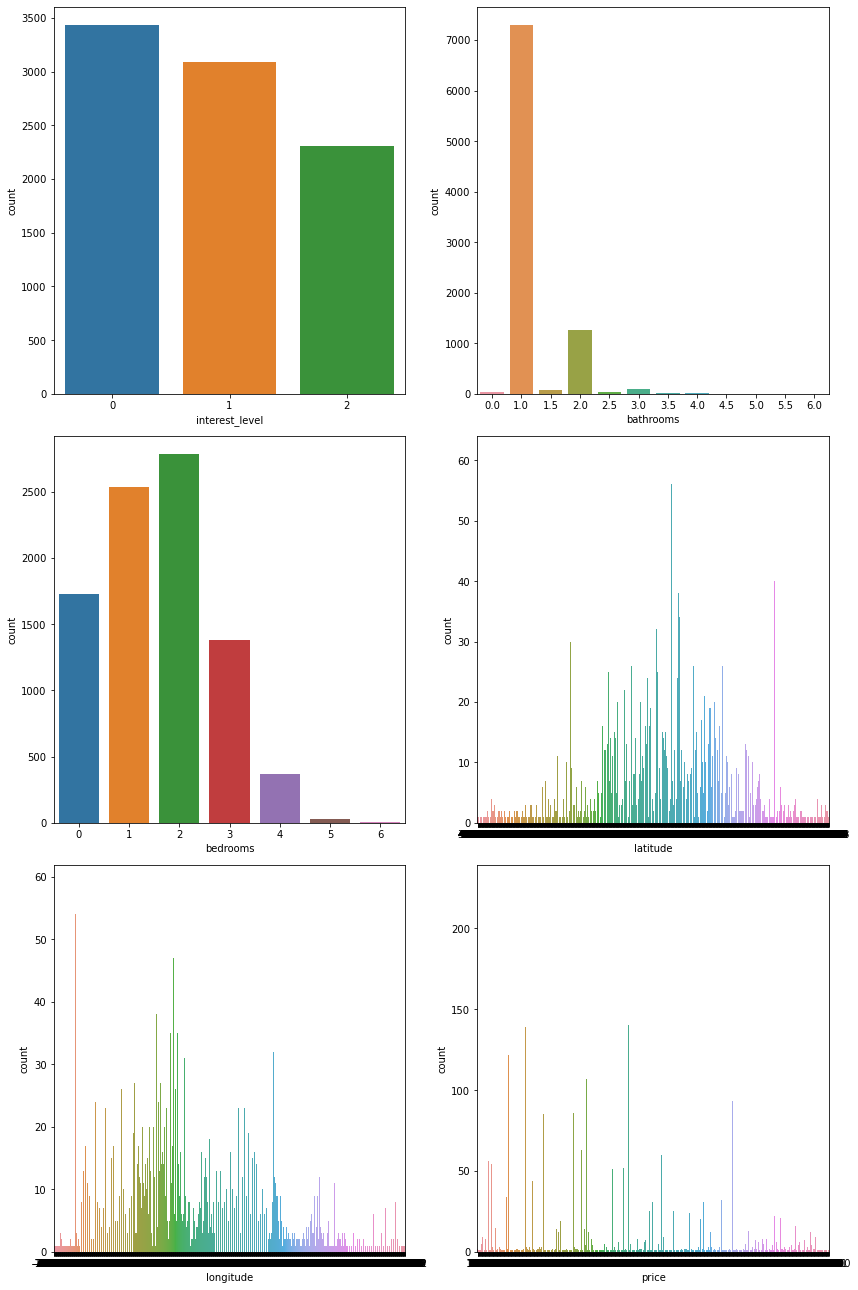

In [84]:
colsubset = train.iloc[:,0:6].columns

fig = plt.figure(figsize=(12,18))
for index,col in enumerate(colsubset):
    plt.subplot(3,2,index+1)
    sns.countplot(train[colsubset].loc[:,col].dropna())
fig.tight_layout(pad=1.0)

In [85]:
# find pairs of correlation above 0.95

def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(train, .95)

interest_level  interest_level   NaN
dtype: float64

In [86]:
train[train.columns[:]].corr()

,interest_level,bathrooms,bedrooms,latitude,longitude,price,balcony,cats.allowed,common.outdoor.space,dining.room,...,parking.space,pre.war,private.outdoor.space,reduced.fee,renovated,roof.deck,simplex,swimming.pool,terrace,wheelchair.access
interest_level,1.000000,-0.102906,0.008261,0.009636,-0.000166,-0.052429,0.032004,-0.072103,0.028253,0.022611,...,-0.029637,-0.094329,0.035078,0.102736,0.044791,-0.027510,-0.070016,-0.022562,0.026993,0.014855
bathrooms,-0.102906,1.000000,0.517191,0.004250,-0.003205,0.101911,0.132425,0.025370,0.005959,0.246712,...,0.033207,-0.002580,0.016297,-0.029402,-0.032266,0.114597,-0.023812,0.120165,0.147726,0.057125
bedrooms,0.008261,0.517191,1.000000,-0.006240,0.005638,0.081606,0.088991,0.004493,0.020495,0.195933,...,0.001070,0.028316,0.029039,0.004001,0.013436,0.063882,0.032139,0.054243,0.098567,0.023516
latitude,0.009636,0.004250,-0.006240,1.000000,-0.757257,0.000617,0.004328,-0.013800,-0.006957,0.006634,...,-0.002704,0.015633,-0.003395,0.005454,-0.009524,-0.000056,0.021540,0.005952,0.003280,-0.002310
longitude,-0.000166,-0.003205,0.005638,-0.757257,1.000000,-0.000454,-0.002844,0.013088,-0.003175,-0.002484,...,-0.001898,-0.001246,0.000087,-0.000111,-0.055177,-0.007510,0.002994,-0.003443,-0.003337,-0.002544
price,-0.052429,0.101911,0.081606,0.000617,-0.000454,1.000000,0.019513,0.019971,0.003615,0.030086,...,0.009188,-0.006619,0.000802,-0.008068,-0.006451,0.016820,-0.010849,0.015161,0.021219,0.010475
balcony,0.032004,0.132425,0.088991,0.004328,-0.002844,0.019513,1.000000,0.028597,-0.033673,0.247036,...,0.016970,-0.039639,0.019597,-0.002460,-0.016711,0.159653,-0.030947,0.113084,0.471898,0.043440
cats.allowed,-0.072103,0.025370,0.004493,-0.013800,0.013088,0.019971,0.028597,1.000000,0.121941,0.025011,...,0.121866,0.078629,0.047158,0.071637,0.017019,0.073608,0.115836,-0.000073,0.024550,0.048439
common.outdoor.space,0.028253,0.005959,0.020495,-0.006957,-0.003175,0.003615,-0.033673,0.121941,1.000000,-0.042794,...,0.328773,-0.059709,0.169994,0.112967,-0.010218,-0.012602,-0.020247,-0.014102,-0.032419,-0.020587
dining.room,0.022611,0.246712,0.195933,0.006634,-0.002484,0.030086,0.247036,0.025011,-0.042794,1.000000,...,-0.028055,0.018547,-0.017728,-0.008740,-0.031377,0.183588,-0.032273,0.162099,0.233488,0.106484


Checking if two categorical variables are independent can be done with Chi-Squared test of independence. 

In [87]:
train.iloc[:,5:]

,price,balcony,cats.allowed,common.outdoor.space,dining.room,dishwasher,dogs.allowed,doorman,elevator,exclusive,...,parking.space,pre.war,private.outdoor.space,reduced.fee,renovated,roof.deck,simplex,swimming.pool,terrace,wheelchair.access
0,5354,1,1,0,1,1,1,1,1,0,...,0,0,0,0,0,1,0,1,1,0
1,4695,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1850,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3030,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,2050,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8826,1400,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8827,2795,0,1,0,0,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
8828,2100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
from sklearn.feature_selection import SelectKBest, chi2
train["interest_level"] = train["interest_level"].astype("category")
train_sub = pd.concat([train.iloc[:,[1,2]], train.iloc[:,5:]], axis = 1)
X, y = train_sub, train.interest_level
X_func = SelectKBest(chi2, k='all').fit(X, y)
X_func.transform(X)
X_func.pvalues_

array([2.71989232e-04, 3.10168271e-03, 0.00000000e+00, 3.90863896e-04,
       6.98967831e-07, 2.91945024e-02, 8.26092474e-03, 3.57422225e-17,
       2.11391714e-07, 1.87607746e-18, 1.77799405e-04, 6.49390783e-05,
       2.68554978e-03, 5.87751156e-10, 1.60751034e-09, 1.33384699e-13,
       7.59625151e-02, 8.72641899e-23, 2.91614091e-03, 4.93635468e-06,
       2.15359688e-15, 8.70360593e-11, 6.41343617e-14, 4.54445689e-02,
       2.18002171e-02, 1.38735416e-10, 5.15512213e-01, 2.09448861e-03,
       9.11945401e-27, 6.01309190e-01, 1.68638767e-08, 9.25820634e-03,
       5.66864152e-15, 7.87632299e-05, 1.69627603e-20, 1.00244234e-05,
       2.11226919e-05, 4.57845705e-13, 2.51925902e-03, 7.88347450e-03,
       3.81327753e-01])

There is three columns does not satisfy goodness of fit, all other columns satisfy the goodness of fit by chisquare, p < 0.05.

In [89]:
len(X.columns)-3

38

In [90]:
X_func = SelectKBest(chi2, k=len(X.columns)-3).fit(X, y)
X_func.pvalues_

array([2.71989232e-04, 3.10168271e-03, 0.00000000e+00, 3.90863896e-04,
       6.98967831e-07, 2.91945024e-02, 8.26092474e-03, 3.57422225e-17,
       2.11391714e-07, 1.87607746e-18, 1.77799405e-04, 6.49390783e-05,
       2.68554978e-03, 5.87751156e-10, 1.60751034e-09, 1.33384699e-13,
       7.59625151e-02, 8.72641899e-23, 2.91614091e-03, 4.93635468e-06,
       2.15359688e-15, 8.70360593e-11, 6.41343617e-14, 4.54445689e-02,
       2.18002171e-02, 1.38735416e-10, 5.15512213e-01, 2.09448861e-03,
       9.11945401e-27, 6.01309190e-01, 1.68638767e-08, 9.25820634e-03,
       5.66864152e-15, 7.87632299e-05, 1.69627603e-20, 1.00244234e-05,
       2.11226919e-05, 4.57845705e-13, 2.51925902e-03, 7.88347450e-03,
       3.81327753e-01])

In [91]:
X_func.transform(X)

array([[2.000e+00, 4.000e+00, 5.354e+03, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 2.000e+00, 4.695e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 1.850e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 2.795e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 2.100e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 2.050e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [92]:
X_func.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False])

In [93]:
train = pd.concat([train.iloc[:,0:5], train_sub.iloc[:,X_func.get_support()].iloc[:,3:]], axis = 1)
train

,interest_level,bathrooms,bedrooms,latitude,longitude,balcony,cats.allowed,common.outdoor.space,dining.room,dishwasher,...,outdoor.space,parking.space,pre.war,private.outdoor.space,reduced.fee,renovated,roof.deck,simplex,swimming.pool,terrace
0,1,2.0,4,40.7182,-74.0148,1,1,0,1,1,...,1,0,0,0,0,0,1,0,1,1
1,0,1.0,2,40.7231,-73.9938,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1.0,1,40.7463,-73.9132,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,2,40.7349,-73.9818,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1.0,1,40.7031,-73.8119,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,0,1.0,1,40.7769,-73.9494,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8826,2,1.0,0,40.8665,-73.9186,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8827,0,1.0,0,40.7047,-74.0076,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8828,0,0.0,1,40.7730,-73.9509,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
test_sub = pd.concat([test.iloc[:,[1,2]], test.iloc[:,5:]], axis = 1)
test = pd.concat([test.iloc[:,0:5], test_sub.iloc[:,X_func.get_support()].iloc[:,3:]], axis = 1)
test

,ID,bathrooms,bedrooms,latitude,longitude,balcony,cats.allowed,common.outdoor.space,dining.room,dishwasher,...,outdoor.space,parking.space,pre.war,private.outdoor.space,reduced.fee,renovated,roof.deck,simplex,swimming.pool,terrace
0,1,1.5,3,40.7145,-73.9425,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,0,40.7769,-73.9467,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,1,40.7709,-73.9496,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1.0,1,40.7075,-74.0079,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,1.0,1,40.7474,-73.9566,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5883,5884,1.0,1,40.7110,-74.0051,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5884,5885,1.0,2,40.7681,-73.9563,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5885,5886,1.0,0,40.7769,-73.9467,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5886,5887,1.0,2,40.7564,-73.9969,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [95]:

from sklearn.decomposition import PCA
train_PCA_subset = train.iloc[:,5:]
test_PCA_subset = test.iloc[:,5:]
pca = PCA(n_components=0.85)
pca.fit(train_PCA_subset)
print(pca.explained_variance_ratio_)

[0.26960538 0.1438278  0.08903672 0.05178885 0.04819365 0.04606965
 0.03831673 0.03607518 0.03378564 0.02808144 0.02500964 0.02070599
 0.01981512]


In [96]:
# PCA
train_PCA = pd.read_csv('../input/w21projii/W21P2_train.csv', encoding='latin1')
test_PCA = pd.read_csv('../input/w21projii/W21P2_test.csv', encoding='latin1')
from sklearn.decomposition import PCA
train_PCA_subset = train_PCA.iloc[:,7:]
test_PCA_subset = test_PCA.iloc[:,7:]
pca = PCA(n_components=0.85)
pca.fit(train_PCA_subset)
print(pca.explained_variance_ratio_)

[0.25599182 0.13820375 0.07916666 0.0485672  0.04239147 0.04007363
 0.03576355 0.03210722 0.02756842 0.02441287 0.0232507  0.01979091
 0.01871361 0.01636207 0.01433322 0.01375875 0.01174455 0.0113957 ]


In [97]:
from sklearn.decomposition import PCA
train_PCA_subset = train.iloc[:,1:]
test_PCA_subset = test.iloc[:,1:]
pca = PCA(n_components=0.85)
pca.fit(train_PCA_subset)
print(pca.explained_variance_ratio_)

[0.23278153 0.16242008 0.14836727 0.08325324 0.04984649 0.03018415
 0.02924712 0.02675762 0.02352899 0.02187895 0.02079674 0.01818018
 0.01621507]


Include first 3 components

In [98]:
from sklearn.decomposition import PCA
train_PCA_subset = train.iloc[:,1:]
test_PCA_subset = test.iloc[:,1:]
pca = PCA(n_components=3)
pca.fit(train_PCA_subset)
print(pca.explained_variance_ratio_)

[0.23278153 0.16242008 0.14836727]


In [99]:
pca_train = pca.transform(train_PCA_subset)
pca_test = pca.transform(test_PCA_subset)

In [100]:
pca_train = pd.DataFrame(pca_train); pca_test = pd.DataFrame(pca_test)

In [101]:
train_final = pd.concat([train, pca_train], axis = 1)
test_final = pd.concat([test, pca_test], axis = 1)

In [102]:
train

,interest_level,bathrooms,bedrooms,latitude,longitude,balcony,cats.allowed,common.outdoor.space,dining.room,dishwasher,...,outdoor.space,parking.space,pre.war,private.outdoor.space,reduced.fee,renovated,roof.deck,simplex,swimming.pool,terrace
0,1,2.0,4,40.7182,-74.0148,1,1,0,1,1,...,1,0,0,0,0,0,1,0,1,1
1,0,1.0,2,40.7231,-73.9938,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1.0,1,40.7463,-73.9132,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,2,40.7349,-73.9818,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1.0,1,40.7031,-73.8119,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,0,1.0,1,40.7769,-73.9494,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8826,2,1.0,0,40.8665,-73.9186,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8827,0,1.0,0,40.7047,-74.0076,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8828,0,0.0,1,40.7730,-73.9509,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
test = pd.read_csv('../input/w21projii/W21P2_test.csv', encoding='latin1')
train = pd.read_csv('../input/w21projii/W21P2_train.csv', encoding='latin1')
train_final['price'] = train['price']
test_final['price'] = test['price']

In [104]:
# Save current data, for doing prediction in R
test_final.to_csv("../../kaggle/working/test_engineered_new.csv", index=False)
train_final.to_csv("../../kaggle/working/train_engineered_new.csv", index=False)

In [105]:
pca_train

,0,1,2
0,3.102213,-0.109179,1.084734
1,-0.025690,0.075508,-1.130113
2,-0.750910,0.064923,-0.571435
3,-0.050520,0.058628,-1.278189
4,-0.956654,0.213788,-0.937098
...,...,...,...
8825,-0.841449,0.050586,-0.491511
8826,-1.830702,0.062825,-0.476002
8827,-1.240477,-0.049438,1.428879
8828,-1.190514,0.063326,-0.950944


In [106]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=18, n_iter=10, random_state=42)
svd.fit(train_PCA_subset)
svd.explained_variance_ratio_

array([0.15996196, 0.23276231, 0.14840263, 0.08334499, 0.04985692,
       0.03018522, 0.02926042, 0.02675974, 0.02352982, 0.02188405,
       0.02079972, 0.01818078, 0.0162177 , 0.01452717, 0.01445321,
       0.01187147, 0.01139458, 0.00861883])